# Project 2: Gold Price Prediction

**Importing the Packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**Data Collection and Processing**

In [3]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv(r'D:\TCR Innovation\gld_price_data.csv')

In [4]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# printing number of rows and columns
gold_data.shape

(2290, 6)

In [7]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**Correlation:**
  1. Positive Correlation
  2. Negative Correlation

In [14]:
correlation = gold_data.corr()

<AxesSubplot:>

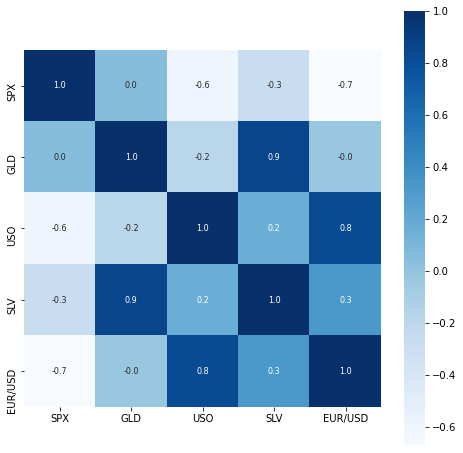

In [16]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [17]:
# correlation values of GOLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

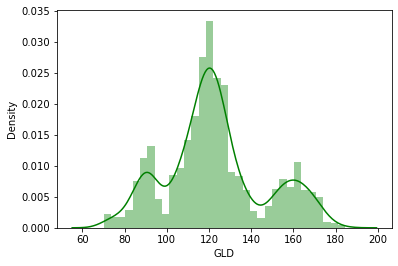

In [18]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

**Splitting the Features and Target**

In [22]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [23]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [24]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


**Splitting into Training data and Test Data**

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

**Model Training : Random Forest Regressor** 

In [26]:
regressor = RandomForestRegressor(n_estimators=100)

In [27]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

**Model Evaluation**

In [28]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [29]:
# printing prediction data
print(test_data_prediction)

[168.84359958  81.81260011 116.17700022 127.72530063 120.81080122
 154.78939819 149.96989774 126.21260004 117.53119875 126.06160034
 116.63230095 172.05600068 141.27699908 167.67459836 115.10660012
 117.57720043 138.23940262 169.86510078 160.02280309 160.01509973
 155.2175007  125.40160046 176.29709972 157.36770403 125.28770053
  93.93139984  76.81730054 120.54469999 119.12869951 167.54379918
  88.27990029 125.46800001  90.95150058 117.56890008 121.21759966
 136.33400062 115.44370128 115.35770058 146.92019972 107.16790092
 104.6291027   87.14919817 126.51929999 118.15379972 152.93629901
 119.45960047 108.36419976 108.15569843  93.13270046 127.09199799
  74.88680022 113.69399921 121.29130009 111.34189911 118.89499881
 120.94939959 159.06450048 168.46040081 147.09769714  85.9005987
  94.21960026  86.81319904  90.58800026 118.92650074 126.44910102
 127.57200012 169.50279905 122.27309919 117.5264988   98.67400052
 168.07430073 143.1180985  131.97560217 121.18370235 121.13759942
 119.645700

In [30]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.989425003002674


**Compare the Actual Values and Predicted Values in a Plot**

In [33]:
Y_test = list(Y_test)

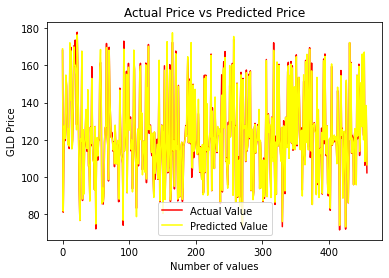

In [34]:
plt.plot(Y_test, color='Red', label = 'Actual Value')
plt.plot(test_data_prediction, color='Yellow', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

**Building a predictive system**

In [36]:
data = (1339.869995	, 111.269997 ,	16.35 ,	1.536901)
input_data = np.asarray(data)
input_data_reshaped = input_data.reshape(1, -1)
prediction = regressor.predict(input_data_reshaped)
print(prediction)
if(prediction[0]):
  print("gold price: ", prediction)
else:
  print("error in prediction")

[85.72449801]
gold price:  [85.72449801]
